# **Deep Learning for Computer Vision**

***Hola Amigos***

Suppose you are a Botanist trying to distinguish which one of the three species a flower belongs to just by looking at four features of a flower - the length and the width of the sepals and petals. As part of your research you create a dataset of these features for a set of flowers for which the species is already known, where each datapoint of this dataset corresponds to a single flower. Now, your colleague brings in a new flower and asks you which species it belongs to. You could go into the lab and do the necessary tests to figure out what species it is, however, the lab is under renovation. So, left with no other choice you pull up the dataset that you created earlier and after a few minutes of trying to find a pattern you realise that this new flower has a petal width and sepal length similar to all the flowers of species 1. Thus, you predict this new flower to be of the species 1. This process of assigning a new datapoint to one of the known classes (flower species) is called classfication. And, as we used a dataset where we knew the classes corresponding to the datapoints before-hand, thus, this classification procedure comes under the umbrella of supervised learning.

Deep learning does exactly the same by learning features from a dataset and making intelligent predictions about new unseen data. It has made rapid advancements in many fields, most notably in the field of computer vision.


<br>

<center><img src="https://miro.medium.com/max/2884/1*YxkzAc1QwaSJHxm6Swi8Fw.png" width = 800></center>

<br>

In this notebook, we will



*   Understanding **Convolutional neural networks(ConvNets)**.
*   Try out techniques like **Data Augumentation** and **Dropout**.



# **What is DEEP LEARNING?**<br>
### How is it different from Machine Learning?

<img src="https://i2.wp.com/semiengineering.com/wp-content/uploads/2018/01/MLvsDL.png?ssl=1">



## What is a Neutal Network and how is it used in Deep Learning?

A single neuron might look as follows:<br>

<img src="https://d2f0ora2gkri0g.cloudfront.net/dd/db/dddb807b-a15b-457d-a21a-8a9e6f029a3e.png" width=1000><br><br>
The idea is a single neuron is just sum of all of the inputs x weights, fed through some sort of activation function. The activation function is meant to simulate a neuron firing or not. A simple example would be a stepper function, where, at some point, the threshold is crossed, and the neuron fires a 1, else a 0.<br>


<img src="http://www.global-engage.com/wp-content/uploads/2018/01/Deep-Learning-blog.png" width=1000><br><br>

A basic neural network consists of an input layer, which is just your data, in numerical form. After your input layer, you will have some number of what are called "hidden" layers. A hidden layer is just in between your input and output layers. One hidden layer means you just have a neural network. Two or more hidden layers? Boom, you've got a deep neural network!


# **The "Hello World" of Deep Learning**<br>
##>Downloading the MNIST Dataset

The MNIST database of handwritten digits, available from this page, has a **training set** of **60,000 examples**, and a **test set** of **10,000 examples.** It is a subset of a larger set available from NIST.

It's a dataset of hand-written digits, 0 through 9. It's **28x28 images** of these hand-written digits.

The digits have been size-normalized and centered in a fixed-size image.
It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.

<img src="https://camo.githubusercontent.com/d440ac2eee1cb3ea33340a2c5f6f15a0878e9275/687474703a2f2f692e7974696d672e636f6d2f76692f3051493378675875422d512f687164656661756c742e6a7067">

The data is included within the Keras framework which can be accessed with a neat little API.

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [ ]:
#load the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

### Note
The data is split into 2: training set and testing set<br><br>
Training set (training is carried out using this dataset):<br>
The x_train is the "feature"==> 28x28 pixel image<br>
y_train is the "label"==> can be anything-->[0,1,2,3,4,5,6,7,8,9]<br><br>
Testing set (testing and validation is carried out using this dataset):<br>
The x_train is the "feature"==> 28x28 pixel image<br>
y_train is the "label"==> can be anything-->[0,1,2,3,4,5,6,7,8,9]<br>


In [ ]:
#Undestanding what the data is !!
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


Here is a sample image of a training set image.

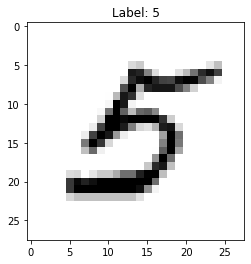

In [ ]:
#Viewing the data
import matplotlib.pyplot as plt
import random
id = random.randint(1,x_train.shape[0])
plt.imshow(x_train[id], cmap="binary")
plt.title("Label: " + str(y_train[id]))
plt.show()

We now reshape the training and test set images 

In [ ]:
#Reshaping the data for the Neural Network
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

print("Shape of the Training Samples: {}".format(x_train.shape))
print("Shape of the Test Samples: {}".format(x_test.shape))

Shape of the Training Samples: (60000, 28, 28, 1)
Shape of the Test Samples: (10000, 28, 28, 1)


In [ ]:
x_train[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

Our pixel values are in the range of 0 to 255. Now let's normalize these values by dividing with the maximum value 255.

In [ ]:
# Normalising the img, so that data could be in between 0 & 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
x_train[1]


array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [ ]:
y_train[0]

5

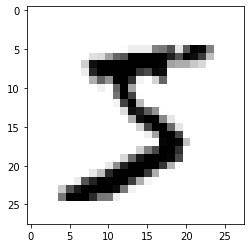

In [ ]:
plt.imshow(x_train[0].squeeze(), cmap="binary")
plt.show()

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train[0]

5

In [ ]:
#using categorical module
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

#**How does the Network Learn?**

###**Gradient Descent and Backpropogation**<br>
<img src="https://www.xpertup.com/wp-content/uploads/2018/05/1-1.gif" width=400><br>
The error is calculated during each trial and the network tends to update its weights in the direction where the error calculated could be **minimum**.<br><br>
<img src="https://miro.medium.com/proxy/1*mTTmfdMcFlPtyu8__vRHOQ.gif" width=450 height=300>__<img src="https://miro.medium.com/max/715/1*x73aS7hzk6tjv_fhh2IK3g.gif" width=400 height=300>




In [ ]:
#Building a Fully Connected Neural Network
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

To check out different activation functions in detail,visit https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html
:)<br><br>
**Designed Model visualization**<br>
<img src="https://miro.medium.com/max/875/1*IWUxuBpqn2VuV-7Ubr01ng.png" width=500 >

In [ ]:
#fitting the model with data[training the network]
history = model.fit(x_train, y_train,epochs=4)

Epoch 1/4
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2334 - accuracy: 0.9302
Epoch 2/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0966 - accuracy: 0.9701
Epoch 3/4
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0664 - accuracy: 0.9797
Epoch 4/4
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0520 - accuracy: 0.9833


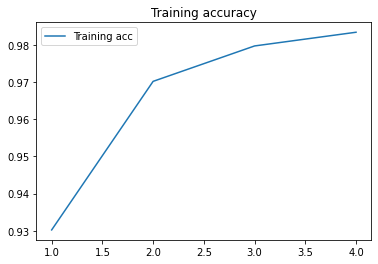

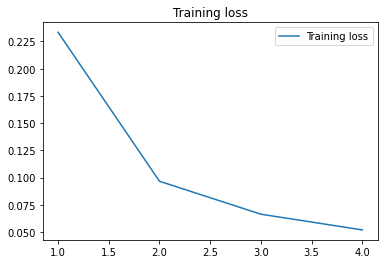

In [ ]:
#plotting the loss and accuracy  in each epoch
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, label='Training acc')
plt.title('Training accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.title('Training loss')
plt.legend()
plt.show()

In [ ]:
#validating the network[analyzing the performing of the network,with the testing dataset]
val_loss, val_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0811 - accuracy: 0.9745


## Demystifying CNN for starters

<center><img src="https://cdn-images-1.medium.com/freeze/max/1000/1*UgbuN6hIr34GOo_5Gzb-DA.png?q=20" width=800></center>

Convolutional Neural Networks are very similar to ordinary Neural Networks: they are made up of neurons that have learnable weights and biases. Each neuron receives some inputs, performs a dot product and optionally follows it with a non-linearity. The whole network still expresses a single differentiable score function: from the raw image pixels on one end to class scores at the other. And they still have a loss function (e.g. SVM/Softmax) on the last (fully-connected) layer and all the tips/tricks we developed for learning regular Neural Networks still apply.

So what changes? ConvNet architectures make the explicit assumption that the inputs are images, which allows us to encode certain properties into the architecture. These then make the forward function more efficient to implement and vastly reduce the amount of parameters in the network.

Source: https://cs231n.github.io/convolutional-networks/ (Great resource to look upon :P)

**The fundamental difference between a densely connected layer and a convolution layer is this: Dense layers learn global patterns in their input feature space (for example, for a MNIST digit, patterns involving all pixels), whereas convolution layers learn local patterns.**




# How does a Conv2D layer work?
Let’s try to understand the concept of convolution with a simple 1-dimensional case first. Suppose our train image is a 1D array with the numbers like below. We want to detect the point that the value changes from 0 to 1. There can be other possible filters but I’ll use a simple one with [-1, 1].<br>
<img src="https://miro.medium.com/max/875/1*LkBTMMY49OTF-I84yESMjQ.png" width=400><br>
Now lets try a 2D and 3D case:.<br>
<img src="https://miro.medium.com/max/875/1*UnhFvQlqySq5NTiat1PG9A.png" width=400 height=300>....<img src="https://miro.medium.com/max/875/1*AS6aFoW8sq7kt5vAiP_5bA.png" width=400 height=300><br>
###This is how it look when we apply it to an image!!<br>
<img src="https://miro.medium.com/max/625/0*0Mukvf3OWXtmFJp3"><br>
##>>Convolution with padding and stride<br>
You might already notice that the pixels of the image aren’t processed with the same number. The pixels at the corner are less counted than those in the middle. This means that the pixels don’t get the same amount of weights. Additionally, If we just keep applying the convolution, we might lose the data too fast. **Padding** is the trick we can use here to fix this problem. As its name, **padding means giving additional pixels at the boundary of the data.**<br>
<img src="https://miro.medium.com/max/875/1*Tq_lyA2uRy4BTBpYlbKTTQ.gif" height=250><br>
By the way, does a filter always have to move one pixel at a time? **Of course not.** We can also make it move two steps or three steps at a time both in the horizontal and vertical ways. This is called **‘stride.’**<br><br>
Then we can ask one question here. Suppose there are a **N x N** input image and **Nc`** number of **f x f** filters. We’ll make **p** number of padding layers and move the filters with the **S** value of stride. Please take a moment to think and converge all we discussed so far. What will be the size of the result?<br>
<img src="https://miro.medium.com/max/875/1*GpFXmpjwEetxuI17O1l8eA.png"  height=300>

#>>Pooling <br>
Pooling is the process of merging. So it’s basically for the purpose of reducing the size of the data.<br>
<img src="https://miro.medium.com/max/875/1*-3-9b0tAakAsdozzhNlEww.png"><br>
When we only take the maximum value inside the box on the left case. This is **‘max pooling.’** We can also take the average values like the picture on the right. This is **‘average pooling.’**<br>
But isn’t this losing valuable data? Why are we reducing the size? It could be seen like losing information at the first glimpse, but it’s rather getting more ‘meaningful’ data than losing. **By removing some noise in the data and extracting only the significant one, we can reduce overfitting and speed up the computation.**<br>
#>>Flattening<br>
Flattening is converting the data into a **1-dimensional array for inputting it to the next layer**. We flatten the output of the convolutional layers to create a single long feature vector. And it is connected to the final classification model, which is called a fully-connected layer. In other words, we put all the pixel data in one line and make connections with the final layer.<br>
<img src="https://miro.medium.com/max/875/1*IWUxuBpqn2VuV-7Ubr01ng.png"  height=350>

In [ ]:
#Adding Conv2D,MaxPooling, and Flattening Layer

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(64, (3,3), activation="relu", input_shape = (28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
 
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#**In One Shot!!**<br>
<img src="https://miro.medium.com/max/875/0*usI_HmpFeF2iPBEM.png">


In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 0.3021 - accuracy: 0.9097
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1120 - accuracy: 0.9657
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0723 - accuracy: 0.9783
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0532 - accuracy: 0.9844
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0420 - accuracy: 0.9871
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0330 - accuracy: 0.9904
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0268 - accuracy: 0.9925
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0219 - accuracy: 0.9936
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0177 - accuracy: 0.9951
Epoch 10/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0145 - accuracy: 0.9959

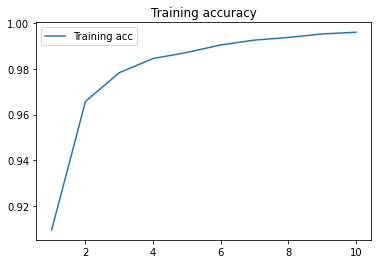

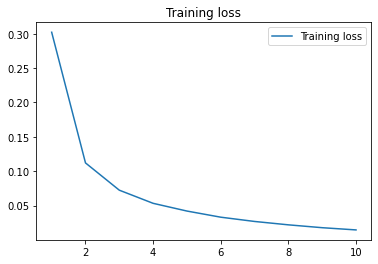

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, label='Training acc')
plt.title('Training accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.title('Training loss')
plt.legend()
plt.show()

In [ ]:
val_loss, val_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0443 - accuracy: 0.9863


In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 100)               1081700   
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1010      
Total params: 1,083,350
Trainable params: 1,083,350
Non-trainable params: 0
_________________________________________________________________


### What makes Convnets so good for images?



1.   A first convolution layer will learn small local patterns such as edges, a second convolution layer will learn larger patterns made of the features of the first layers, and so on. This allows convnets to efficiently learn increasingly complex and abstract visual concepts
2.   After learning a certain pattern in the lower-right corner of a picture, a convnet can recognize it anywhere: for example, in the upper-left corner. A densely connected network would have to
learn the pattern anew if it appeared at a new location.



## Visualising what a convnet learns

Notebook Link: https://colab.research.google.com/drive/1id7nrYbGmytdMx56YAwXspoVQo2OTiNi?usp=sharing

## Resources



1.   https://cs231n.github.io/convolutional-networks/
2.   https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53

